# Problem 2. [50 points]
Given
*   two images of a plane
*   taken by two cameras with
1.   non-zero translation between them
2.   and arbitrary orientations

## a. [10 points]
Algebraically prove that the images are related by a 2D homography (i.e. a 2D projective transformation).




```
A 2D homography is a projective transformation that relates two images of the same planar object. It can be represented by a 3x3 matrix H, such that for any point (x, y) in the first image, the corresponding point (x', y') in the second image is given by:

x' = (h_11 * x + h_12 * y + h_13) / (h_31 * x + h_32 * y + h_33)
y' = (h_21 * x + h_22 * y + h_23) / (h_31 * x + h_32 * y + h_33)

To prove that the images are related by a 2D homography, we need to find the matrix H that satisfies these equations for a set of corresponding points (x, y) and (x', y').

One way to do this is to use the Direct Linear Transformation (DLT) algorithm, which determines the matrix H by solving a system of linear equations. Specifically, for each pair of corresponding points (x, y) and (x', y'), we can create two equations of the form:

h_11 * x + h_12 * y + h_13 = (h_31 * x + h_32 * y + h_33) * x'
h_21 * x + h_22 * y + h_23 = (h_31 * x + h_32 * y + h_33) * y'

If we have at least four pairs of corresponding points, we can use these equations to solve for the entries of H. This can be done using a variety of methods, such as the Gauss-Jordan elimination or singular value decomposition.

Once we have found the matrix H that satisfies these equations, we can conclude that the images are related by a 2D homography.
```



## b. [40 points]
Use MATLAB/Python to simulate
### i. [5 points]
A set of at least a 100 random points on a randomly-oriented 3D plane.
Show that your generated points are indeed on a plane.

In [ ]:
!pip install git+https://github.com/smidm/camera.py.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/smidm/camera.py.git to /tmp/pip-req-build-61m27rrw
  Running command git clone -q https://github.com/smidm/camera.py.git /tmp/pip-req-build-61m27rrw


In [ ]:
#Import libraries

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import camera
import math
import cv2

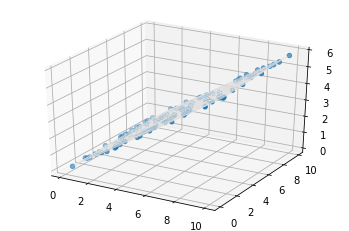

In [ ]:
#Number of hyperplanes
n = 1
#Dimension of space
d = 3
i = 0
plt3d = plt.figure().gca(projection='3d')

for i in range(n):
    #Create random point on unit sphere
    v = np.random.normal(size = d)
    v = v/np.sqrt(np.sum(v**2))

    # create x,y
    x, y = np.random.uniform(0,10,100), np.random.uniform(0,10,100)
    xx = x.flatten()
    yy = y.flatten()
    z = (-v[0] * xx - v[1] * yy)/v[2]

    # plot the surface
    plt3d.scatter(xx, yy, z)
    plt3d.plot_trisurf(xx, yy, z, color='white')

plt.show()

## Or

In [ ]:
pip install random-geometry-points

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from random_geometry_points.plane import Plane

# create a plane object with n = (1, 0, 0), x0 = (0, 0, 0), d = 0 and radius = 10
normal_vec = (1.0, 0.0, 0.0)
ref_point = (0.0, 0.0, 0.0)
plane = Plane(normal_vec, 0.0, ref_point, 10.0)

# create and print 100 random points lying on the plane
random_plane_points = plane.create_random_points(100)
print(random_plane_points)
# example output: [(0.0, -2.058506783308933, -5.777518695971468), (0.0, 2.501766732323411, 6.740902158795952), (0.0, 7.846400008799242, 5.304670974614023)]

[(0.0, 2.239390713552963, -4.605247138779652), (0.0, 0.14244241487169618, 2.35460733760713), (0.0, -3.052693844745673, 7.756175489754256), (0.0, -9.020528487640838, 3.5358654502581692), (0.0, 0.17737073789623573, -1.7450638677391717), (0.0, -7.571476447130718, -2.661995778063587), (0.0, 3.102581625135913, -4.842765577156578), (0.0, -0.28011358230772926, -0.37544851893204967), (0.0, -5.536470339420751, 0.49823148749954727), (0.0, -2.455317959172445, -3.826570208464804), (0.0, -5.7815247447903815, 3.6454000664029906), (0.0, -0.3971375031274448, -0.4215296209861751), (0.0, 1.2913524805132701, 0.9291052426919412), (0.0, 6.334473258168322, 3.679749580641278), (0.0, 1.453765937741896, 1.4009933432262325), (0.0, 3.8886262208996536, 1.910215461617824), (0.0, 1.4481394362801512, -5.589008337287738), (0.0, 0.21658213101998505, 1.513639411021092), (0.0, -0.21879115002493854, -8.242469179098746), (0.0, 0.3707146930856776, -0.529333068753143), (0.0, -0.014240639795930989, -1.4697116395658774), (0.0

### ii. [5 points]
Set up two arbitrary camera matrices.


In [ ]:
## Camera 1 matrix

c1 = camera.Camera()
# Update pinhole camera intrinsic parameters and updates P matrix
# set_K_elements(u0_px, v0_px, f=1, theta_rad=1.5707963267948966, a=1)
c1.set_K_elements(2.0, math.pi/2, 1, 45, 1)

# Set camera extrinsic parameters and updates P
R1 = np.array(
    [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]])
c1.set_R(R1)

# Set camera translation and updates P
c1.set_t(np.array([[1], [2], [3]]))

In [ ]:
# Camera 1 center in the world coordinates
c1.get_camera_center()

array([[-0.25819889],
       [-0.51639778],
       [-0.77459667],
       [ 0.25819889]])

In [ ]:
# Camera 1 principal point
c1.get_principal_point_px()

array([[2.        , 1.57079633]])

In [ ]:
## Camera 2 matrix

c2 = camera.Camera()
# Update pinhole camera intrinsic parameters and updates P matrix
c2.set_K_elements(10.0, math.pi/2, 1, 45, 1)

# Set camera extrinsic parameters and updates P
R2 = np.array(
    [[0.9, 0, 0.1],
     [0, 1, 0],
     [-0.1, 0, 0.9]])
c2.set_R(R2)

# Set camera translation and updates P
c2.set_t(np.array([[3], [2], [1]]))

In [ ]:
# Camera 2 center in the world coordinates
c2.get_camera_center()

array([[ 0.76463974],
       [ 0.48231122],
       [ 0.35291065],
       [-0.24115561]])

In [ ]:
# Camera 2 principal point
c2.get_principal_point_px()

array([[10.        ,  1.57079633]])

### iii. [10 points]
Through a script, compute the image coordinates of the 3D points on the plane using these cameras.


In [ ]:
# Create an array for all the 3D random world points
w = []
i = 0
j = 0
for i in range(0,100):
  j = np.array([[xx[i]], [yy[i]], [z[i]], [1]])
  w.append(j)

w[0]

array([[8.83060554],
       [3.00403715],
       [4.96920022],
       [1.        ]])

In [ ]:
# Create arrays for all the 2D image points on the two image planes
p1 = []
p2 = []
i = 0
j = 0
k = 0
for i in range(0,100):
  j = c1.world_to_image(w[i])
  k = c2.world_to_image(w[i])
#  c1.plot_world_points(w[i],'ro')
  p1.append(j)
  p2.append(k)

In [ ]:
# Image point of camera 1
p1[0]

array([[2.84591487],
       [2.30874382],
       [1.        ]])

In [ ]:
# Image point of camera 2
p2[0]

array([[11.82059808],
       [ 2.85224542],
       [ 1.        ]])

In [ ]:
# x image coordinates
px1 = []
px2 = []
# y image coordinates
py1 = []
py2 = []
# z image coordinates
pz1 = []
pz2 = []
i = 0
for i in range(0,100):
  j1 = p1[i][0]
  j2 = p2[i][0]
  k1 = p1[i][1]
  k2 = p2[i][1]
  l1 = p1[i][2]
  l2 = p2[i][2]
  px1.append(j1)
  px2.append(j2)
  py1.append(k1)
  py2.append(k2)
  pz1.append(l1)
  pz2.append(l2)

px1 = np.array(px1).flatten()
px2 = np.array(px2).flatten()
py1 = np.array(py1).flatten()
py2 = np.array(py2).flatten()
pz1 = np.array(pz1).flatten()
pz2 = np.array(pz2).flatten()

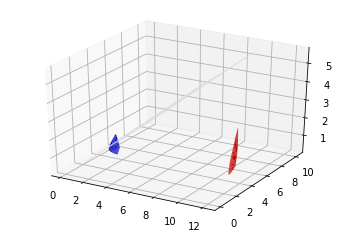

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# 3D world plane
ax.plot_trisurf(xx, yy, z, color='white')
# Camera 1 image plane
ax.plot_trisurf(px1, py1, pz1, color='blue')
# Camera 2 image plane
ax.plot_trisurf(px2, py2, pz2, color='red')


plt.show()

### iv. [10 points]
Use the cv2.findHomography function from this tutorial for computing homography between image points. Another technique called Direct Linear Transform, for computing homography can also be used, which gives more stable results for noisy data. DLT is described in Chapter 4 of HZ text, if you are interested, but we have not covered it in class.



In [ ]:
def find_homography(points_source, points_target):
    A  = construct_A(points_source, points_target)
    u, s, vh = np.linalg.svd(A, full_matrices=True)

    # Solution to H is the last column of V, or last row of V transpose
    homography = vh[-1].reshape((3,3))
    return homography/homography[2,2]

def construct_A(points_source, points_target):
    assert points_source.shape == points_target.shape, "Shape does not match"
    num_points = points_source.shape[0]

    matrices = []
    for i in range(num_points):
        partial_A = construct_A_partial(points_source[i], points_target[i])
        matrices.append(partial_A)
    return np.concatenate(matrices, axis=0)

def construct_A_partial(point_source, point_target):
    x, y, z = point_source[0], point_source[1], 1
    x_t, y_t, z_t = point_target[0], point_target[1], 1

    A_partial = np.array([
        [0, 0, 0, -z_t*x, -z_t*y, -z_t*z, y_t*x, y_t*y, y_t*z],
        [z_t*x, z_t*y, z_t*z, 0, 0, 0, -x_t*x, -x_t*y, -x_t*z]
    ])
    return A_partial

In [ ]:
# Camera 1 homography from world plane at z = 0 to image plane
cam1 = c1.get_z0_homography()
cam1

array([[ 1.        , -0.61736962,  5.76526075],
       [ 0.        ,  1.17522136,  7.06283171],
       [ 0.        ,  0.        ,  3.        ]])

In [ ]:
# Camera 2 homography from world plane at z = 0 to image plane
cam2 = c2.get_z0_homography()
cam2

array([[-0.1       , -0.61736962, 11.76526075],
       [-0.15707963,  1.17522136,  3.92123905],
       [-0.1       ,  0.        ,  1.        ]])

### v. [10 points]
Now show that the two images are related by a homography i.e. the points from the first image coincide with the second image after the homography computed above. To show this, you will have to set up an error function between transformed points and original points. If they are indeed related by a homography, the error should be very low.

In [ ]:
#error = np.sqrt(np.square(cam1)) - np.sqrt(np.square(cam2))
error = cam1 -cam2
error

array([[ 0.9       ,  0.        , -6.        ],
       [-0.15707963,  0.        ,  3.14159265],
       [-0.1       ,  0.        ,  2.        ]])